<a href="https://colab.research.google.com/github/Abdulbarikassim/FaceEmotionDetection/blob/main/Custom_Fer_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os


# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download the fer2013 dataset
!kaggle datasets download -d msambare/fer2013 -p /content/gdrive/MyDrive/

# Unzip the dataset
!unzip /content/gdrive/MyDrive/fer2013.zip -d /content/gdrive/MyDrive/

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/train/sad/Training_65242339.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65267116.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65275626.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_6529266.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65329617.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65338712.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65338797.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65387162.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65404494.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65426218.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65430136.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_65437377.jpg  
  inflating: /content/gdrive/MyDrive/train/sad/Training_6545735.jpg  
  inflating: /content/gdrive

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

#path to my training and testing data.

train_data_dir = '/content/drive/MyDrive/train'
test_data_dir = '/content/drive/MyDrive/test'


#loading and preprocessing of the images.

augemented_trained_data = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

augemented_test_data= ImageDataGenerator(rescale=1./255)

# load images from directories
train_data = augemented_trained_data.flow_from_directory(train_data_dir,
                                                    target_size=(48,48),
                                                    batch_size=64,
                                                    color_mode='grayscale',
                                                    class_mode='categorical')

test_data= augemented_test_data.flow_from_directory(test_data_dir,
                                                  target_size=(48,48),
                                                  batch_size=64,
                                                  color_mode='grayscale',
                                                  class_mode='categorical')





Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


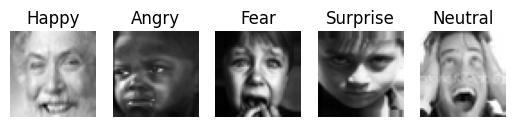

In [ ]:
import matplotlib.pyplot as plt

#fetch one batch
images ,labels  = next(train_data)
#labels map to numerical

label_map = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

#displaying random  first 5 images.
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i][:,:,0],cmap='gray')
  plt.title(f"{label_map[np.argmax(labels[i])]}")
  plt.axis('off')

plt.show()



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

import time


#number of classes
num_classes = len(train_data.class_indices)



#create the custom CNN model
def custom_cnn():
  model = Sequential([
      #1st layer
      Conv2D(16,(3,3),activation='relu',input_shape=(48,48,1)),
      MaxPooling2D(2,2),
      BatchNormalization(),
      #second layer
      Conv2D(32,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      BatchNormalization(),

      #third layer
      Conv2D(64,(3,3),activation='relu'),
      MaxPooling2D(2,2),
      BatchNormalization(),

      Flatten(),
      Dense(256,activation='softmax'),
      Dropout(0.5),
      Dense(num_classes,activation='softmax')

  ])

  return model

  return model
# Create the model
model = custom_cnn()

#start time of the model
start_time = time.time()


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
built_custom_cnn = model.fit(train_data,epochs=30)

#total time taken to train the model

end_time = time.time()
total_time = (end_time - start_time)/60



#training accuracy of the model
train_accuracy = built_custom_cnn.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}% ")

print(f"Total time taken to train the model: {total_time:.2f} seconds")

#saving the model for in google drive for later use.
model_path = '/content/drive/MyDrive/my_model_2.h5'
model.save(model_path)

print(f"model save to: {model_path}")



Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 164s 355ms/step - accuracy: 0.2572 - loss: 1.8803
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 154s 343ms/step - accuracy: 0.2910 - loss: 1.7732
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 155s 345ms/step - accuracy: 0.3248 - loss: 1.7105
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 156s 346ms/step - accuracy: 0.3375 - loss: 1.6661
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 156s 347ms/step - accuracy: 0.3449 - loss: 1.6521
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 154s 342ms/step - accuracy: 0.3554 - loss: 1.6305
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 155s 345ms/step - accuracy: 0.3730 - loss: 1.6022
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 153s 340ms/step - accuracy: 0.3856 - loss: 1.5746
Epoch 9/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 155s 345ms/step - accuracy: 0.3870 - loss: 1.5691
Epoch 10/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 153s 341ms/step - accuracy: 0.3959 - loss: 1.5606
Epoch 11/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 154s 343ms/step - accuracy: 0.4037 - loss: 1.5401
Epoch 12

Training Accuracy: 53.44% 
Total time taken to train the model: 79.60 seconds
model save to: /content/drive/MyDrive/my_model_2.h5


In [2]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
#evaluate the model on test data.
test_loss , test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

In [ ]:
import numpy as np

# Get a batch of test images and labels
test_images, test_labels = next(test_data)
predictions = model.predict(test_images)

# Convert softmax outputs to label indices
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Print first 10 predictions
print("Predicted labels: ", predicted_labels[:5])
print("True labels: ", true_labels[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 
Predicted labels:  [3 3 3 4 6]
True labels:  [3 3 3 5 6]


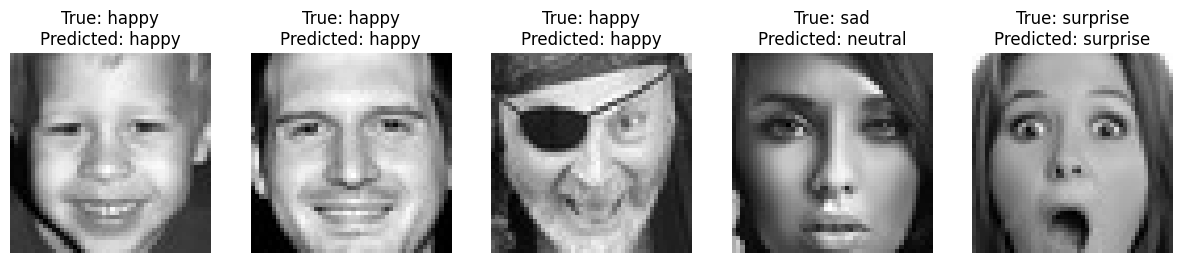

In [ ]:
import matplotlib.pyplot as plt

# label mapping from train data
label_map = train_data.class_indices
label_map = {v: k for k, v in train_data.class_indices.items()}

# displaying the test images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(test_images[i].reshape(48, 48), cmap='gray')
    axes[i].set_title(f"True: {label_map[true_labels[i]]}\nPredicted: {label_map[predicted_labels[i]]}")
    axes[i].axis('off')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from  google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
# !ls /content/gdrive/MyDrive/datasets/ckextended.csv


In [ ]:

import cv2




# CK+ CSV path
ck_plus_csv = '/content/gdrive/MyDrive/datasets/ckextended.csv'

# Load CK+ CSV
ck_data = np.genfromtxt(ck_plus_csv, delimiter=',', dtype=str, skip_header=1)

# Extract columns
emotions = ck_data[:, 0]
usage = ck_data[:, -1]

# Extract and process pixel data
pixel_strings = ck_data[:, 1]
pixels = np.array([np.fromstring(pixel_str, dtype=np.float32, sep=' ') for pixel_str in pixel_strings])

# Verify pixel shape
print("Pixels shape:", pixels.shape)
print("Number of pixel columns:", pixels.shape[1])

# Reshape and resize (assuming 920 ≈ 30x30 + 20 extras, truncate to 900)
num_samples = pixels.shape[0]
X_ck_temp = pixels[:, :900].reshape(num_samples, 30, 30, 1)
X_ck = np.zeros((num_samples, 48, 48, 1), dtype=np.float32)
for i in range(num_samples):
    # Resize and then add the channel dimension back
    resized_image = cv2.resize(X_ck_temp[i], (48, 48), interpolation=cv2.INTER_AREA)
    X_ck[i] = resized_image[:,:,np.newaxis]
X_ck = X_ck / 255.0  # Normalize


# Map emotions to integers
emotion_map = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Sad': 4, 'Surprise': 5, 'Neutral': 6}
y_ck = np.array([emotion_map.get(emotion, -1) for emotion in emotions])

# Split into train and test
train_mask = usage == 'training'
X_ck_train = X_ck[train_mask]
y_ck_train = y_ck[train_mask]
X_ck_test = X_ck[~train_mask]
y_ck_test = y_ck[~train_mask]

# One-hot encode labels
NUM_CLASSES = 7
y_ck_train = tf.keras.utils.to_categorical(y_ck_train, NUM_CLASSES)
y_ck_test = tf.keras.utils.to_categorical(y_ck_test, NUM_CLASSES)

# Print sample counts
print(f"CK+ train samples: {X_ck_train.shape[0]}, Test samples: {X_ck_test.shape[0]}")

Pixels shape: (920, 2304)
Number of pixel columns: 2304
CK+ train samples: 0, Test samples: 920


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import time


IMG_SIZE = (48,48)
BATCH_SIZE = 32

fer_train_dir = '/content/gdrive/MyDrive/train'
fer_test_dir = '/content/gdrive/MyDrive/test'



augmented_train_data = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'

)
augemented_test_data = ImageDataGenerator(rescale=1./255)


train_data = augmented_train_data.flow_from_directory(
    fer_train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

test_data = augemented_test_data.flow_from_directory(
    fer_test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)
#Extract fer to numpy
def generate_to_numpy(generator):
  X,y =[],[]
  for _ in range(len(generator)):
    batch_X, batch_y = next(generator)
    X.append(batch_X)
    y.append(batch_y)
  return np.concatenate(X),np.concatenate(y)

X_fer_train , y_fer_train = generate_to_numpy(train_data)
X_fer_test , y_fer_test = generate_to_numpy(test_data)

print(f"Fer2013 train data: {X_fer_train.shape[0]}, Test samples: {X_fer_test.shape[0]}")





Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


KeyboardInterrupt: 

In [ ]:
# Combine training data
X_train_combined = np.concatenate([X_fer_train, X_ck_train], axis=0)
y_train_combined = np.concatenate([y_fer_train, y_ck_train], axis=0)

# Combine test data
X_test_combined = np.concatenate([X_fer_test, X_ck_test], axis=0)
y_test_combined = np.concatenate([y_fer_test, y_ck_test], axis=0)

print(f"Combined Train samples: {X_train_combined.shape[0]}, Test samples: {X_test_combined.shape[0]}")

NameError: name 'np' is not defined

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import time

# Load pre-trained model
model_path = '/content/gdrive/MyDrive/my_model.h5'
model = load_model(model_path)
print("Pre-trained model loaded successfully")

# Compile with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train on combined data
start_time = time.time()
history = model.fit(X_train_combined, y_train_combined,
                    batch_size=BATCH_SIZE,
                    epochs=10,
                    validation_data=(X_test_combined, y_test_combined))

# Timing and accuracy
end_time = time.time()
total_time = end_time - start_time
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Total time taken to train: {total_time:.2f} seconds")

# Save updated model
new_model_path = '/content/gdrive/MyDrive/my_model_fer_ck_plus.h5'
model.save(new_model_path)
print(f"Updated model saved to: {new_model_path}")

OSError: [Errno 107] Unable to synchronously open file (unable to open file: name = '/content/gdrive/MyDrive/my_model.h5', errno = 107, error message = 'Transport endpoint is not connected', flags = 0, o_flags = 0)